# NLTK experiments

Import the NLTK module, and import the Genesis corpus.

In [29]:
import nltk
from nltk.corpus import genesis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Working with a corpus

Check the number of sentenses in Genesis:

In [2]:
len(genesis.sents())

13640

Show the first seven sentences:

In [6]:
print('\n'.join(sentence for sentence in
                (' '.join(words) for words in genesis.sents()[:7])))

In the beginning God created the heaven and the earth .
And the earth was without form , and void ; and darkness was upon the face of the deep .
And the Spirit of God moved upon the face of the waters .
And God said , Let there be light : and there was light .
And God saw the light , that it was good : and God divided the light from the darkness .
And God called the light Day , and the darkness he called Night .
And the evening and the morning were the first day .


## Part Of Speech tagging

Tag the first 100 sentences.

In [19]:
tagged = [nltk.pos_tag(sentence) for sentence in genesis.sents()[:20]]

Show the first tagged sentence:

In [12]:
tagged[0]

[('In', 'IN'),
 ('the', 'DT'),
 ('beginning', 'NN'),
 ('God', 'NNP'),
 ('created', 'VBD'),
 ('the', 'DT'),
 ('heaven', 'NN'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('earth', 'NN'),
 ('.', '.')]

## Named entities

Find named entities:

In [13]:
entities = [nltk.chunk.ne_chunk(tagged_sent) for tagged_sent in tagged]

Show first sentence:

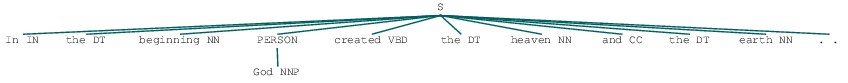

In [14]:
entities[0]

Also show the third sentence to see whether the Spirit is a person too:

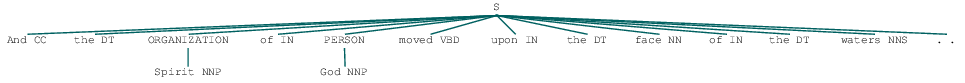

In [15]:
entities[2]

Theologists might not be entirely happy, although the trinity has been a mystifying concept from its introduction.

In [20]:
print(entities[2])

(S
  And/CC
  the/DT
  (ORGANIZATION Spirit/NNP)
  of/IN
  (PERSON God/NNP)
  moved/VBD
  upon/IN
  the/DT
  face/NN
  of/IN
  the/DT
  waters/NNS
  ./.)


An element of entities is an nltk.Tree object with tuples, except for the named entities, which are nltk.Tree objects again. Define a function that takes a nltk.Tree, and returns a dictionary of named entities.

In [27]:
def named_entities(tree, ne={}):
    for subtree in tree:
        if type(subtree) == nltk.Tree:
            ne_type = subtree.label()
            if ne_type not in ne:
                ne[ne_type] = set()
            ne[ne_type].add(subtree[0][0])
    return ne

Find all named entities in the first twenty sentences:

In [28]:
ne = {}
for entity in entities:
    named_entities(entity, ne)
ne

{'GPE': {'Assyria',
  'Be',
  'Behold',
  'Cain',
  'Earth',
  'Eden',
  'Ethiopia',
  'Hast',
  'Havilah',
  'Night',
  'Nod',
  'Where'},
 'ORGANIZATION': {'LORD', 'Spirit'},
 'PERSON': {'Abel',
  'Adam',
  'Cain',
  'Eden',
  'Enoch',
  'Euphrates',
  'Gihon',
  'God',
  'Hiddekel',
  'Pison',
  'Thorns',
  'Thou',
  'Unto',
  'Where',
  'Who',
  'Woman',
  'Ye',
  'Yea'}}

Oh well, room for improvement...

## Sentiment analysis

Create a VADER sentiment polarity analyzer:

In [30]:
sentiment_analyzer = SentimentIntensityAnalyzer()

Analyze the first ten sentences of Genesis, first define a function to format the results though.

In [36]:
def format_sentiments(sentence, score):
    fmt_str = '{0}\n\tcompound: {1:.3f}, negative: {2:.2f}, neutral: {3:.2f}, positive: {4:.2f}'
    return fmt_str.format(sentence, score['compound'], score['neg'], score['neu'], score['pos'])

In [37]:
for sentence in genesis.sents()[:10]:
    sentence_str = ' '.join(sentence)
    score = sentiment_analyzer.polarity_scores(sentence_str)
    print(format_sentiments(sentence_str, score))

In the beginning God created the heaven and the earth .
	compound: 0.751, negative: 0.00, neutral: 0.49, positive: 0.51
And the earth was without form , and void ; and darkness was upon the face of the deep .
	compound: -0.250, negative: 0.11, neutral: 0.89, positive: 0.00
And the Spirit of God moved upon the face of the waters .
	compound: 0.421, negative: 0.00, neutral: 0.72, positive: 0.28
And God said , Let there be light : and there was light .
	compound: 0.273, negative: 0.00, neutral: 0.83, positive: 0.17
And God saw the light , that it was good : and God divided the light from the darkness .
	compound: 0.625, negative: 0.09, neutral: 0.59, positive: 0.32
And God called the light Day , and the darkness he called Night .
	compound: 0.026, negative: 0.14, neutral: 0.71, positive: 0.15
And the evening and the morning were the first day .
	compound: 0.000, negative: 0.00, neutral: 1.00, positive: 0.00
And God said , Let there be a firmament in the midst of the waters , and let it di

## Conclusion

NLTK is easy to work with, but good results require domain knowledge.